This notebook contains **YOLOV3** Ultralytics inference and training code for Dhaka traffic detection challenge

source: [https://github.com/ultralytics/yolov3](https://)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip Yolov3_minhaz-001.zip; rm Yolov3_minhaz-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: Yolov3_minhaz/yolov3/data/valid/labels/Dipto_612_jpg.rf.dfb78b85b515c693f18d1e8046457e20.txt  
  inflating: Yolov3_minhaz/yolov3/data/train/images/Dipto_496_jpg.rf.c953738b255c1739c31d4d23aa803ba2.jpg  
  inflating: Yolov3_minhaz/yolov3/data/test/sabiha(261)_jpg.rf.743c1c6a6aa0640ab841c6a29d10b613.jpg  
  inflating: Yolov3_minhaz/yolov3/data/train/labels/Navid_443_jpg.rf.fcc38439d8d1f1814317def66b2f5f94.txt  
  inflating: Yolov3_minhaz/yolov3/data/train/images/Numan_(224)_jpg.rf.d54d62aa8778fda8350f210669d6b2ed.jpg  
  inflating: Yolov3_minhaz/yolov3/data/train/labels/Dipto_651_jpg.rf.20e1ccdb0b6699f5ceaad5f3cb7599a7.txt  
  inflating: Yolov3_minhaz/yolov3/data/test/Shykat_4_ (35)_jpg.rf.e4f936fdd85ef9be751464be25a9170a.jpg  
  inflating: Yolov3_minhaz/yolov3/data/train/labels/Pias (502)_jpg.rf.b9ae2715447241ab4681b9f827e8876d.txt  
  inflating: Yolov3_minhaz/yolov3/data/train/labels/Dipto_611_jpg.rf.08ace772b674fb99fc34e0

In [ ]:
%cd /content/drive/My Drive/Yolov3_minhaz/yolov3


/content/drive/My Drive/Yolov3_minhaz/yolov3


In [ ]:
!git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 9449, done.
remote: Total 9449 (delta 0), reused 0 (delta 0), pack-reused 9449
Receiving objects: 100% (9449/9449), 7.82 MiB | 8.79 MiB/s, done.
Resolving deltas: 100% (6473/6473), done.


In [ ]:
%cd yolov3/


/content/drive/My Drive/Yolov3_minhaz/yolov3


In [ ]:
!ls

cfg	   Dockerfile  README.md	 train.py	 weights
data	   LICENSE     requirements.txt  tutorial.ipynb
detect.py  models.py   test.py		 utils


In [ ]:
pip install -U -r requirements.txt

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (0.29.21)
     |████████████████████████████████| 11.6MB 4.4MB/s 
     |████████████████████████████████| 14.5MB 237kB/s 
     |████████████████████████████████| 49.5MB 59kB/s 
     |████████████████████████████████| 2.2MB 57.7MB/s 
     |████████████████████████████████| 276kB 59.6MB/s 
     |████████████████████████████████| 25.9MB 108kB/s 
Requirement already up-to-date: tensorboard>=2.2 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 11)) (2.3.0)
Requirement already up-to-date: torch>=1.6.0 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 12)) (1.6.0+cu101)
Requirement already up-to-date: torchvision>=0.7.0 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 13)) (0.7.0+cu101)
     |████████████████████████████████| 71kB 10.9MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linu

In [ ]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
cd datasets/

/content/drive/My Drive/datasets


In [ ]:
!cp Traffic_detection_data_v1.zip '/content/drive/My Drive/Yolov3_minhaz/yolov3/data'

In [ ]:
cd /content/drive/My Drive/Yolov3_minhaz/yolov3/data

/content/drive/My Drive/Yolov3_minhaz/yolov3/data


# Train datas are divided into **90%** train and **10%** valid data. 

In [ ]:
!unzip Traffic_detection_data_v1.zip; rm Traffic_detection_data_v1.zip;

Streaming output truncated to the last 5000 lines.
  inflating: train/Dipto_ 65_jpg.rf.55cbeadd498c7fd9ac5143ab6a0ae17a.jpg  
  inflating: train/Dipto_ 65_jpg.rf.55cbeadd498c7fd9ac5143ab6a0ae17a.txt  
  inflating: train/Dipto_ 66_jpg.rf.74b25fbafccd847ffebbd8bcd925d3ea.jpg  
  inflating: train/Dipto_ 66_jpg.rf.74b25fbafccd847ffebbd8bcd925d3ea.txt  
  inflating: train/Dipto_ 67_jpg.rf.9c23efc5db12acd5caaa92ed06795fa0.jpg  
  inflating: train/Dipto_ 67_jpg.rf.9c23efc5db12acd5caaa92ed06795fa0.txt  
  inflating: train/Dipto_ 69_jpg.rf.38463f44fcf874c15a8ea695ec63af7b.jpg  
  inflating: train/Dipto_ 69_jpg.rf.38463f44fcf874c15a8ea695ec63af7b.txt  
  inflating: train/Dipto_ 70_jpg.rf.f5db494df1cd2893f8bd3bafd8120d04.jpg  
  inflating: train/Dipto_ 70_jpg.rf.f5db494df1cd2893f8bd3bafd8120d04.txt  
  inflating: train/Dipto_ 71_jpg.rf.81b1497a202844ffc8c9d0f1abcf8b49.jpg  
  inflating: train/Dipto_ 71_jpg.rf.81b1497a202844ffc8c9d0f1abcf8b49.txt  
  inflating: train/Dipto_ 72_jpg.rf.16e1b1c250a3f

In [ ]:
cd /content/drive/My Drive/Yolov3_minhaz/yolov3/data/train

/content/drive/My Drive/Yolov3_minhaz/yolov3/data/train


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd /content/drive/My Drive/Yolov3_minhaz/yolov3/data/train/images

/content/drive/My Drive/Yolov3_minhaz/yolov3/data/train/images


In [ ]:
rm train.txt

In [ ]:
# create Ultralytics specific text file of training images
file = open("train.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train.txt":
        pass
      else:
        file.write("data/train/images/" + filename + "\n")
file.close()

In [ ]:
%cat train.txt

data/train/images/Dipto_ 95_jpg.rf.ff309d1119436728290089561650244a.jpg
data/train/images/Pias (420)_jpg.rf.eddf2d8d56a941c73b51a9eec058f9cb.jpg
data/train/images/Navid_516_jpg.rf.fb2960cd70787ae0a60f9b8162c7123b.jpg
data/train/images/Navid_480_jpg.rf.ec6b9c094c5aa19f7e63090270e76b6e.jpg
data/train/images/Pias (527)_jpg.rf.f2e506cdee1fe0c327d01c006431276a.jpg
data/train/images/Dipto_738_jpg.rf.f4d5429045a3a0c317a2a54f867c4f34.jpg
data/train/images/Numan_(391)_jpg.rf.f28983af195e8b9c8b40ceeefd1f53ed.jpg
data/train/images/Dipto_658_jpg.rf.f6a413a9f65f033e5896f4884548809e.jpg
data/train/images/Navid_126_jpg.rf.fdc45a59cabc2b5d9de50cdee0bb8316.jpg
data/train/images/Navid_494_jpg.rf.f11cf066ece8ced3d1b81bb5cefd9b9c.jpg
data/train/images/Pias (261)_jpg.rf.f86b4b7c007686a2ed1c9c299d3d2ae8.jpg
data/train/images/Dipto_849_jpg.rf.fc398c459cd4b15a0995f12a5116a35d.jpg
data/train/images/Navid_726_jpg.rf.fec53638149db902a61321cd4cd3e5ce.jpg
data/train/images/Navid_358_jpg.rf.ec5a9c32d79649d78b5b211f

In [ ]:
%cd ../../

[Errno 2] No such file or directory: '../../valid'
/content/drive/My Drive/Yolov3_minhaz/yolov3/data


In [ ]:
%cd /content/drive/My Drive/Yolov3_minhaz/yolov3/data/valid

/content/drive/My Drive/Yolov3_minhaz/yolov3/data/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd /content/drive/My Drive/Yolov3_minhaz/yolov3/data/valid/images

/content/drive/My Drive/Yolov3_minhaz/yolov3/data/valid/images


In [ ]:
rm valid.txt

In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("data/valid/images/" + filename)
      if filename == "valid.txt":
        pass
      else:
        file.write("data/valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid.txt

data/valid/images/Numan_ (27)_jpg.rf.b2f3a8b3c6475fa23eb52037434fd1d3.jpg
data/valid/images/Dipto_ 42_jpg.rf.c9ea722f63e00abff2a2e55a93979031.jpg
data/valid/images/Numan_(126)_jpg.rf.96f9ea84f72f700424b80b706099baa6.jpg
data/valid/images/Navid_806_jpg.rf.8e82d8f7af6e4010f4f1ae120fc90b13.jpg
data/valid/images/Dipto_811_jpg.rf.d875ea0bd1d2651d56d785a8569ff3d7.jpg
data/valid/images/Numan_(345)_jpg.rf.7dff04552cecdb5e5efa8886e8e9f3a7.jpg
data/valid/images/Dipto_524_jpg.rf.837a3b6e388307b648b6ab0b30d9924d.jpg
data/valid/images/Navid_790_jpg.rf.f496553c25126de8c53831c60e4dae3d.jpg
data/valid/images/Dipto_772_jpg.rf.de64286341ccaf76da72d63866a1da17.jpg
data/valid/images/Dipto_363_jpg.rf.bcfe53352ad6a922c7221605fd77e2bb.jpg
data/valid/images/Pias (77)_jpg.rf.e2578c25fc5efc0d049b8e50186c4304.jpg
data/valid/images/Pias (392)_jpg.rf.fab71eee94f2fe65671308d3de88ab0c.jpg
data/valid/images/Dipto_ 340_jpg.rf.caf174960309bc868f58604b0fca6be2.jpg
data/valid/images/Navid_738_jpg.rf.df09270f0322cbbf2f7c8

In [ ]:
%cd ../../

/content/drive/My Drive/Yolov3_minhaz/yolov3/data


In [ ]:
%cd /content/drive/My Drive/Yolov3_minhaz/yolov3/data/valid/labels

/content/drive/My Drive/Yolov3_minhaz/yolov3/data/valid/labels


In [ ]:

%cat _classes.txt 

ambulance
army vehicle
auto rickshaw
bicycle
bus
car
garbagevan
human hauler
minibus
minivan
motorbike
pickup
policecar
rickshaw
scooter
suv
taxi
three wheelers (CNG)
truck
van
wheelbarrow

In [ ]:
# convert classes.txt to .names for Ultralytics specification
%cat _classes.txt > ../traffic_classes.names

In [ ]:
!mv ../traffic_classes.names '/content/drive/My Drive/Yolov3_minhaz/yolov3/data/train'

In [ ]:
cd ../../

/content/drive/My Drive/Yolov3_minhaz/yolov3/data


In [ ]:
%cat traffic.data

classes=21
train= data/train/images/train.txt
valid=data/valid/images/valid.txt
names=data/train/traffic_classes.names

In [ ]:
cd ../


/content/drive/My Drive/Yolov3_minhaz/yolov3


In [ ]:
cd weights/

/content/drive/My Drive/Yolov3_minhaz/yolov3/weights


In [ ]:
!gdown --id 1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4

Downloading...
From: https://drive.google.com/uc?id=1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4
To: /content/drive/My Drive/Yolov3_minhaz/yolov3/weights/yolov3-spp-ultralytics.pt
252MB [00:02, 111MB/s]


In [ ]:
!ls

download_yolov3_weights.sh  yolov3-spp-ultralytics.pt


In [ ]:
!python train.py -h

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
usage: train.py [-h] [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--cfg CFG]
                [--data DATA] [--multi-scale]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect] [--resume]
                [--nosave] [--notest] [--evolve] [--bucket BUCKET]
                [--cache-images] [--weights WEIGHTS] [--name NAME]
                [--device DEVICE] [--adam] [--single-cls] [--freeze-layers]

optional arguments:
  -h, --help            show this help message and exit
  --epochs EPOCHS
  --batch-size BATCH_SIZE
  --cfg CFG             *.cfg path
  --data DATA           *.data path
  --multi-scale         adjust (67% - 150%) img_size every 10 batches
  --img-size IMG_SIZE [IMG_SIZE ...]
                        [min_train, max-train, test]
  --rect                rectangular training
  --resume              resume training from last.pt
  --nosave              only save final checkpoint
  --note

In [ ]:
cd cfg

/content/drive/My Drive/Yolov3_minhaz/yolov3/cfg


In [ ]:
cd ../

/content/drive/My Drive/Yolov3_minhaz/yolov3


In [ ]:
pwd

'/content/drive/My Drive/Yolov3_minhaz/yolov3'

In [ ]:
!python train.py --cfg cfg/yolov3-spp.cfg \
                 --data data/traffic.data \
                 --epochs 200 \
                 --batch-size 8 \
                 --weights weights/last.pt \
                 --name yolov3-traffic

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/traffic.data', device='', epochs=200, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='yolov3-traffic', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-10-28 13:21:24.218222: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels data/train/labels.npy (2702 found, 0 missing, 1 empty, 1 duplicate, for 2703 images): 100% 2703/2703 [00:00<00:00, 16982.16it

In [ ]:
cd /content/drive/My Drive/Yolov3_minhaz/yolov3

/content/drive/My Drive/Yolov3_minhaz/yolov3


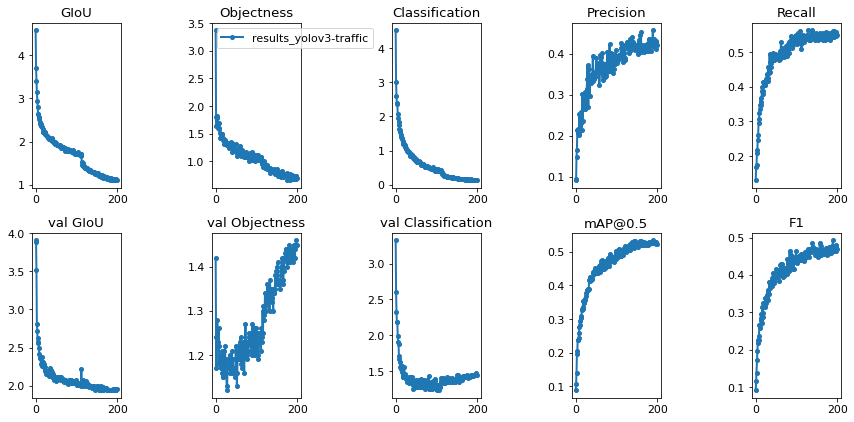

In [ ]:
from utils import utils; utils.plot_results() 

In [ ]:
!python detect.py -h

usage: detect.py [-h] [--cfg CFG] [--names NAMES] [--weights WEIGHTS]
                 [--source SOURCE] [--output OUTPUT] [--img-size IMG_SIZE]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--fourcc FOURCC] [--half] [--device DEVICE] [--view-img]
                 [--save-txt] [--classes CLASSES [CLASSES ...]]
                 [--agnostic-nms] [--augment]

optional arguments:
  -h, --help            show this help message and exit
  --cfg CFG             *.cfg path
  --names NAMES         *.names path
  --weights WEIGHTS     weights path
  --source SOURCE       source
  --output OUTPUT       output folder
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --fourcc FOURCC       output video codec (verify ffmpeg support)
  --half                half precision FP16 inference
  --device DEVICE       device 

In [ ]:
!python detect.py --save-txt --names data/train/traffic_classes.names --img-size 1024 --cfg cfg/yolov3-spp.cfg --weights weights/best_yolov3-traffic.pt --source data/test

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=1024, iou_thres=0.6, names='data/train/traffic_classes.names', output='output', save_txt=True, source='data/test', view_img=False, weights='weights/best_yolov3-traffic.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
image 1/500 data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 1 ambulances, 1 motorbikes, 2 pickups, Done. (0.123s)
image 2/500 data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 1 auto rickshaws, 3 buss, 4 cars, 1 minivans, 2 motorbikes, 1 vans, Done. (0.123s)
image 3/500 data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 1 ambulances, 1 bicycles, 1 buss, 1 cars, 1 motorbikes, Done. (0.123s)
image 4/500 data/test/Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c

In [ ]:
!python test.py --data data/traffic.data --cfg cfg/yolov3-spp.cfg --weights weights/best_yolov3-traffic.pt --img 1024 --augment

Namespace(augment=True, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/traffic.data', device='', img_size=1024, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best_yolov3-traffic.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26542e+07 parameters, 6.26542e+07 gradients
Caching labels data/valid/labels/valid.txt (300 found, 0 missing, 0 empty, 1 duplicate, for 300 images): 100% 300/300 [01:11<00:00,  4.19it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/19 [00:00<?, ?it/s]/content/drive/My Drive/Yolov3_minhaz/yolov3/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/pyt

In [ ]:
from models import *  
from utils.datasets import *
from utils.utils import *

def detect(save_img=False):
    imgsz = opt.img_size 
    out, source, weights, half, view_img, save_txt = opt.output, opt.source, opt.weights, opt.half, opt.view_img, opt.save_txt

    # Initialize
    device = torch_utils.select_device(opt.device)
    if os.path.exists(out):
        shutil.rmtree(out)  # delete output folder
    os.makedirs(out)  # make new output folder

    # Initialize model
    model = Darknet(opt.cfg, imgsz)

    # Load weights
    attempt_download(weights)
    if weights.endswith('.pt'):  # pytorch format
        model.load_state_dict(torch.load(weights, map_location=device)['model'])
    else:  # darknet format
        load_darknet_weights(model, weights)

    
    # Eval mode
    model.to(device).eval()

    # Half precision
    half = half and device.type != 'cpu'  # half precision only supported on CUDA
    if half:
        model.half()

    # Set Dataloader
    vid_path, vid_writer = None, None
    save_img = True
    dataset = LoadImages(source, img_size=imgsz)

    # Get names and colors
    names = load_classes(opt.names)
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(names))]

    # Run inference
    t0 = time.time()
    img = torch.zeros((1, 3, imgsz, imgsz), device=device)  # init img
    _ = model(img.half() if half else img.float()) if device.type != 'cpu' else None  # run once

    results=[]
    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = torch_utils.time_synchronized()
        pred = model(img, augment=opt.augment)[0]
        t2 = torch_utils.time_synchronized()

        # to float
        if half:
            pred = pred.float()

        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_thres, opt.iou_thres,
                                   multi_label=False, classes=opt.classes, agnostic=opt.agnostic_nms)

        
        # Process detections
        for i, det in enumerate(pred):  # detections for image i
            
            p, s, im0 = path, '', im0s          

            save_path = str(Path(out) / Path(p).name)
            #print(p)
            s += '%gx%g ' % img.shape[2:]  # print string
            #print(s)
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  #  normalization gain whwh
            if det is not None and len(det):
                # Rescale boxes from imgsz to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += '%g %ss, ' % (n, names[int(c)])  # add to string

                xmin = []
                ymin = []
                xmax = []
                ymax = []
                scores = []
                labels_value=[]
                image_ids=[]
                # Write results
                for *xyxy, conf, cls in det:
                    if save_txt:  # Write to file
                        
                        conf_score = '%.2f' % (conf)
                        label_with_cls = '%s' % (names[int(cls)])
                        
                        labels_value.append(label_with_cls)
                        
                        xmin.append(int(xyxy[0]))
                        ymin.append(int(xyxy[1]))
                        xmax.append(int(xyxy[2]))
                        ymax.append(int(xyxy[3]))
                        
                        scores.append(conf_score)
                        image_ids.append(save_path)

                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        with open(save_path[:save_path.rfind('.')] + '.txt', 'a') as file:
                            file.write(('%g ' * 5 + '\n') % (cls, *xywh))  # label format

                    if save_img or view_img:  # Add bbox to image
                        label = '%s %.2f' % (names[int(cls)], conf)
                        plot_one_box(xyxy, im0, label=label, color=colors[int(cls)])

            # Print time (inference + NMS)
            print('%sDone. (%.3fs)' % (s, t2 - t1))

            # Stream results
            if view_img:
                cv2.imshow(p, im0)
                if cv2.waitKey(1) == ord('q'):  # q to quit
                    raise StopIteration

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'images':
                    cv2.imwrite(save_path, im0)
        result = {
            'image_id': image_ids,
            'score': scores,
            'class': labels_value,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax

            }

        results.append(result)

    if save_txt or save_img:
        print('Results saved to %s' % os.getcwd() + os.sep + out)

    print('Done. (%.3fs)' % (time.time() - t0))
    return results

In [ ]:
class opt:
    cfg='/content/drive/My Drive/Yolov3_minhaz/yolov3/cfg/yolov3-spp.cfg'
    names='data/train/traffic_classes.names'
    weights='weights/best_yolov3-traffic.pt'
    source='data/test'
    save_txt=True
    output='output'
    classes=False
    img_size=1024
    conf_thres=0.3
    iou_thres=0.6
    fourcc='mp4v'
    half=False
    device=''
    view_img=False
    agnostic_nms=False
    augment=False

In [ ]:
# predict results
with torch.no_grad():
    res=detect()

Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
image 1/500 data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 1 ambulances, 1 motorbikes, 2 pickups, Done. (0.111s)
image 2/500 data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 1 auto rickshaws, 3 buss, 4 cars, 1 minivans, 2 motorbikes, 1 vans, Done. (0.111s)
image 3/500 data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 1 ambulances, 1 bicycles, 1 buss, 1 cars, 1 motorbikes, Done. (0.092s)
image 4/500 data/test/Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c17a17c41cb1f.jpg: 1024x1024 Done. (0.143s)
image 5/500 data/test/Sabiha_(10)_jpg.rf.d163e2a53d5ed22112e9ead62807acf4.jpg: 1024x1024 1 buss, 4 cars, 1 pickups, 1 suvs, Done. (0.139s)
image 6/500 data/test/Sabiha_(11)_jpg.rf.36299290e6d6ce12423051e1f5084f05.jpg: 1024x1024 2 cars, 1 rickshaws, 3 three wheelers (CNG)s, Done

In [ ]:
import pandas as pd
import numpy as np

append_data=[]

for i in range(len(res)):
  
  df = pd.DataFrame(res[i], columns = ['image_id','class','score','xmin','ymin','xmax','ymax'])
 
  append_data.append(df)

finl_results=pd.concat(append_data)

finl_results.image_id = [x.strip('output/') for x in finl_results.image_id]

finl_results['width'] = 1024
finl_results['height'] = 1024

In [ ]:
finl_results.head()

,image_id,class,score,xmin,ymin,xmax,ymax,width,height
0,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,pickup,0.95,642,564,793,804,1024,1024
1,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,motorbike,0.76,270,669,362,887,1024,1024
2,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,pickup,0.55,590,679,640,756,1024,1024
3,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,ambulance,0.46,533,672,578,735,1024,1024
0,Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494...,car,0.98,792,674,924,816,1024,1024


In [ ]:
finl_results.to_csv('submission_v1.csv', index=False)

In [ ]:
%cat submission_v1.csv

image_id,class,score,xmin,ymin,xmax,ymax,width,height
Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg,pickup,0.95,642,564,793,804,1024,1024
Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg,motorbike,0.76,270,669,362,887,1024,1024
Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg,pickup,0.55,590,679,640,756,1024,1024
Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg,ambulance,0.46,533,672,578,735,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg,car,0.98,792,674,924,816,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg,car,0.94,593,689,663,788,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg,car,0.92,640,676,853,901,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg,bus,0.89,536,644,577,724,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg,car,0.88,479,693,497,740,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg,van,0.86,495,661,565,798,1024,1024
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2